In [ ]:
# Step 1: Install the XGBoost Library
# XGBoost (Extreme Gradient Boosting) is a powerful library for building optimized gradient boosting models.
# It is widely used for classification and regression tasks in machine learning.
# The following command installs the XGBoost library if it is not already installed on your system.

!pip install xgboost



In [ ]:
# Step 2: Import Standard Libraries
# Importing libraries that are essential for data analysis, visualization, and model evaluation.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
# Step 3: Load the Dataset from GitHub Repository
url = "https://raw.githubusercontent.com/IndulekhaKP/credit-card-fraud-detection/main/data/creditcard.csv"
data = pd.read_csv(url)
print(f"Dataset shape: {data.shape}")
data.head(100)



Dataset shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,64.0,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,0.025133,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0
96,64.0,0.959602,0.370711,0.888613,2.343244,0.352491,1.365515,-0.277771,0.516053,-0.700929,...,-0.155547,-0.403239,0.356504,-0.696881,-0.198718,-0.220268,0.068546,0.020797,7.55,0
97,67.0,-0.653445,0.160225,1.592256,1.296832,0.997175,-0.343000,0.469937,-0.132470,-0.197794,...,0.038363,0.336449,-0.014883,0.102959,-0.265322,-0.348637,0.011238,-0.049478,19.85,0
98,67.0,-1.494668,0.837241,2.628211,3.145414,-0.609098,0.258495,-0.012189,0.102136,-0.286164,...,-0.140047,0.355044,0.332720,0.718193,-0.219366,0.118927,-0.317486,-0.340783,28.28,0


In [ ]:
# Step 4: Check for Missing Values
# Checking for any missing or null values in each column to ensure data completeness.

print("Missing values per column:\n", data.isnull().sum())


Missing values per column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


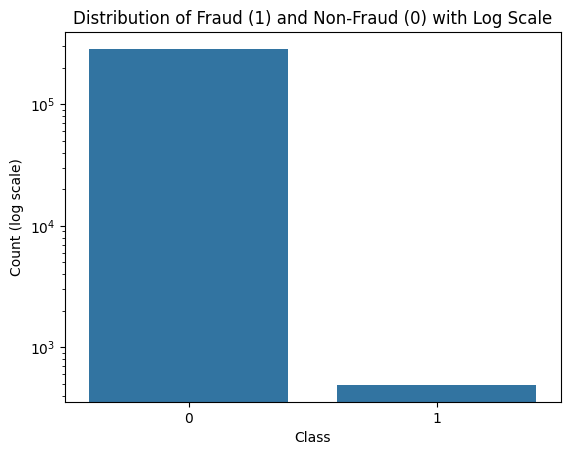

In [ ]:
# Step 5: Visualize the Class Distribution (Fraud and Non-Fraud)
# Plotting the distribution of Fraud (Class = 1) and Non-Fraud (Class = 0) cases.
# Using a log scale on the y-axis to handle the class imbalance and make the visualization clearer.

sns.countplot(x='Class', data=data)
plt.yscale('log')  # Log scale to view imbalance clearly
plt.title("Distribution of Fraud (1) and Non-Fraud (0) with Log Scale")
plt.xlabel("Class")
plt.ylabel("Count (log scale)")
plt.show()


In [ ]:
# Step 6: Define Features and Target Variable
# Separating the dataset into features (X) and target variable (y).
# Features (X): All columns except 'Class', which will be used as input for the model.
# Target variable (y): The 'Class' column, indicating fraud (1) or non-fraud (0).

X = data.drop(columns=['Class'])  # Features
y = data['Class']  # Target variable (fraud or non-fraud)



In [ ]:
# Step 7: Split the Data into Training and Test Sets
# Dividing the dataset into training and testing subsets to evaluate the model.
# Training set: 80% of the data used to train the model.
# Test set: 20% of the data used to test and validate the model's performance.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 8: Calculate scale_pos_weight for Handling Imbalance
# Calculating the ratio of non-fraudulent (Class 0) to fraudulent (Class 1) cases in the training data.
# This weight helps the model handle the class imbalance by giving more importance to the minority class (fraud cases).

scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]



In [ ]:
# Step 9: Initialize and Train the XGBoost Classifier
# Initializing the XGBoost model with class weighting to handle the class imbalance effectively.
# Training the model on the training dataset (X_train, y_train).

from xgboost import XGBClassifier

# Initialize XGBoost with class weighting
model_xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the XGBoost model on the training data
model_xgb.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:46:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Step 10: Make Predictions on the Test Data
# Using the trained XGBoost model to predict the class labels (fraud or non-fraud) for the test dataset (X_test).

y_pred = model_xgb.predict(X_test)



In [ ]:
# Step 11: Evaluate the Model's Performance
# Printing the accuracy score to assess the overall correctness of the model's predictions.
# Generating a detailed classification report to evaluate metrics such as precision, recall, and F1-score for each class.

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9996839998595555
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.83      0.90        98

    accuracy                           1.00     56962
   macro avg       0.99      0.91      0.95     56962
weighted avg       1.00      1.00      1.00     56962



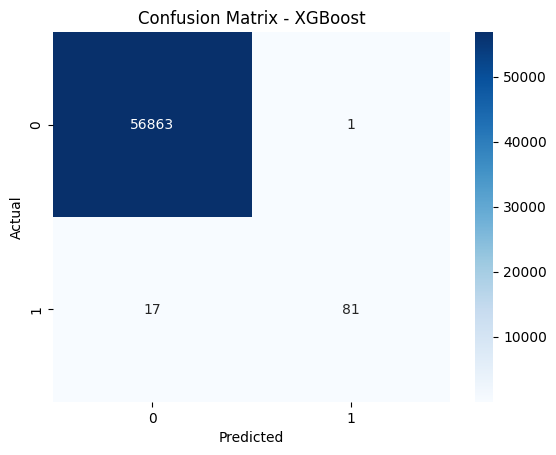

In [ ]:
# Step 12: Plot the Confusion Matrix to Visualize Model Performance
# Creating a heatmap to display the confusion matrix, which shows the counts of true positives, true negatives,
# false positives, and false negatives. This helps visualize how well the model is distinguishing between classes.

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


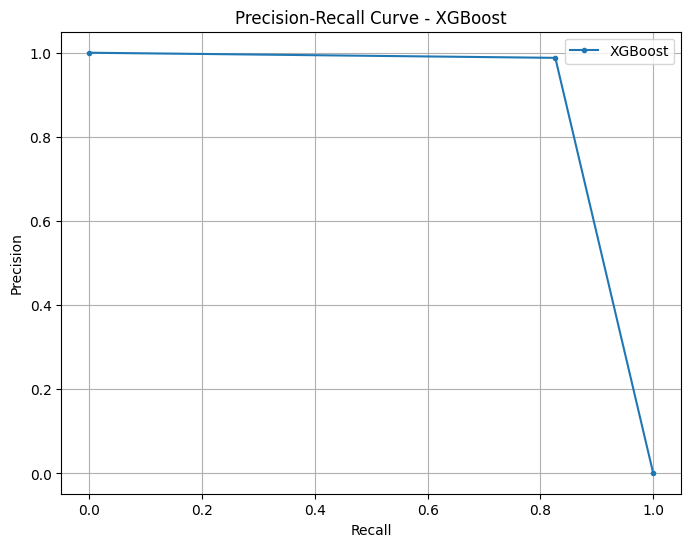

In [ ]:
# Plot Precision-Recall Curve for XGBoost

from sklearn.metrics import precision_recall_curve


y_pred_xgb = model_xgb.predict(X_test)  # Predictions for test data
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
plt.plot(recall_xgb, precision_xgb, marker='.', label='XGBoost')
plt.title("Precision-Recall Curve - XGBoost")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()



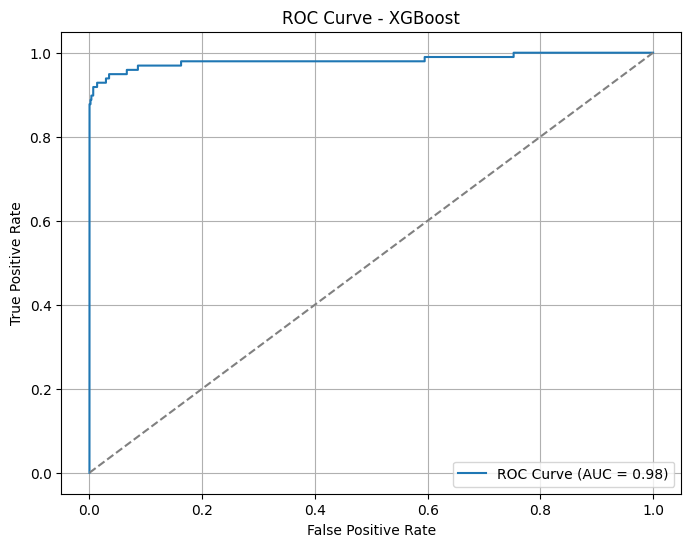

In [ ]:
# Plot ROC Curve for XGBoost
from sklearn.metrics import roc_curve, auc


y_pred_prob_xgb = model_xgb.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'ROC Curve (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Baseline
plt.title("ROC Curve - XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()



In [ ]:
# Save the trained XGBoost model as .pkl
import pickle

with open("xgboost_model.pkl", "wb") as file:
    pickle.dump(model_xgb, file)

print("Trained XGBoost model saved as 'xgboost_model.pkl'.")


Trained XGBoost model saved as 'xgboost_model.pkl'.


In [ ]:
from google.colab import files

# Download each file locally
files.download("xgboost_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>